In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.preprocessing import (
    OneHotEncoder,
    StandardScaler
)

from sklearn.model_selection import (
    train_test_split,
    GridSearchCV
)


from sklearn.model_selection import (
    StratifiedKFold,
    cross_validate,
    cross_val_score,
    KFold
)
from sklearn.linear_model import LogisticRegression    # Импорт модели логистической регрессии
from sklearn.tree import DecisionTreeClassifier        # Импорт классификатора на основе дерева решений
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

from sklearn import metrics
from sklearn.metrics import (
    accuracy_score,
    balanced_accuracy_score,
    precision_score,
    recall_score,
    confusion_matrix,
    multilabel_confusion_matrix,
    f1_score,
    roc_auc_score,
    roc_curve,
    average_precision_score,
    precision_recall_curve
)
from sklearn.metrics import roc_curve, precision_recall_curve, auc
from sklearn.tree import plot_tree  # Функция для визуализации структуры дерева решений

# Функция для оценки важности признаков, основанная на изменении точности модели при перестановке значений признаков
from sklearn.inspection import permutation_importance

In [54]:
cirrhosis = pd.read_csv('cirrhosis.csv')
cirrhosis.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [55]:
cirrhosis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

In [56]:
# Найдите все повторяющиеся строки в данных и удалите их. Для поиска используйте все признаки в данных. Сколько записей осталось в данных?

dupl_columns = list(cirrhosis.columns)
dupl_columns.remove

mask = cirrhosis.duplicated(subset=dupl_columns)
cirrhosis_duplicates = cirrhosis[mask]
print(f'Число найденных дубликатов: {cirrhosis_duplicates.shape[0]}')

Число найденных дубликатов: 0


In [57]:
cirrhosis.describe()

,ID,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,418.000000,418.000000,418.000000,418.000000,284.000000,418.000000,310.000000,312.000000,312.000000,282.000000,407.000000,416.000000,412.000000
mean,209.500000,1917.782297,18533.351675,3.220813,369.510563,3.497440,97.648387,1982.655769,122.556346,124.702128,257.024570,10.731731,3.024272
std,120.810458,1104.672992,3815.845055,4.407506,231.944545,0.424972,85.613920,2140.388824,56.699525,65.148639,98.325585,1.022000,0.882042
min,1.000000,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,105.250000,1092.750000,15644.500000,0.800000,249.500000,3.242500,41.250000,871.500000,80.600000,84.250000,188.500000,10.000000,2.000000
50%,209.500000,1730.000000,18628.000000,1.400000,309.500000,3.530000,73.000000,1259.000000,114.700000,108.000000,251.000000,10.600000,3.000000
75%,313.750000,2613.500000,21272.500000,3.400000,400.000000,3.770000,123.000000,1980.000000,151.900000,151.000000,318.000000,11.100000,4.000000
max,418.000000,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,4.000000


In [58]:
# удаляем строки с более чем двумя пропущенными значениями: 

m = cirrhosis.shape[1]
cirrhosis = cirrhosis.dropna(thresh=m-2, axis=0)
print(cirrhosis.shape[0])

312


In [59]:
cirrhosis.info()

<class 'pandas.core.frame.DataFrame'>
Index: 312 entries, 0 to 311
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             312 non-null    int64  
 1   N_Days         312 non-null    int64  
 2   Status         312 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            312 non-null    int64  
 5   Sex            312 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          312 non-null    object 
 10  Bilirubin      312 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        312 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      308 non-null    float64
 18  Prothrombin    

In [60]:
cirrhosis = cirrhosis.replace(to_replace=['M', 'F'], value=[1, 0])
display(cirrhosis)

C:\Users\Admin\AppData\Local\Temp\ipykernel_16708\132879871.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cirrhosis = cirrhosis.replace(to_replace=['M', 'F'], value=[1, 0])


,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,0,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,0,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,1,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,0,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,0,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,308,1153,C,D-penicillamine,22347,0,N,Y,N,N,0.4,246.0,3.58,24.0,797.0,91.00,113.0,288.0,10.4,2.0
308,309,994,C,Placebo,21294,0,N,N,N,N,0.4,260.0,2.75,41.0,1166.0,70.00,82.0,231.0,10.8,2.0
309,310,939,C,D-penicillamine,22767,0,N,N,N,N,1.7,434.0,3.35,39.0,1713.0,171.00,100.0,234.0,10.2,2.0
310,311,839,C,D-penicillamine,13879,0,N,N,N,N,2.0,247.0,3.16,69.0,1050.0,117.00,88.0,335.0,10.5,2.0


In [61]:
cirrhosis = cirrhosis.replace(to_replace=['Y', 'N'], value=[1, 0])
display(cirrhosis)

C:\Users\Admin\AppData\Local\Temp\ipykernel_16708\1579460534.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cirrhosis = cirrhosis.replace(to_replace=['Y', 'N'], value=[1, 0])


,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,0,1,1,1,1,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,0,0,1,1,0,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,1,0,0,0,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,0,0,1,1,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,0,0,1,1,0,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,308,1153,C,D-penicillamine,22347,0,0,1,0,0,0.4,246.0,3.58,24.0,797.0,91.00,113.0,288.0,10.4,2.0
308,309,994,C,Placebo,21294,0,0,0,0,0,0.4,260.0,2.75,41.0,1166.0,70.00,82.0,231.0,10.8,2.0
309,310,939,C,D-penicillamine,22767,0,0,0,0,0,1.7,434.0,3.35,39.0,1713.0,171.00,100.0,234.0,10.2,2.0
310,311,839,C,D-penicillamine,13879,0,0,0,0,0,2.0,247.0,3.16,69.0,1050.0,117.00,88.0,335.0,10.5,2.0


In [62]:
cirrhosis = cirrhosis.replace(to_replace=['C','CL', 'D'], value=[1, 1, 0])
cirrhosis = cirrhosis.replace(to_replace=['D-penicillamine', 'Placebo'], value=[1, 0])
display(cirrhosis)

C:\Users\Admin\AppData\Local\Temp\ipykernel_16708\2911496699.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cirrhosis = cirrhosis.replace(to_replace=['C','CL', 'D'], value=[1, 1, 0])
C:\Users\Admin\AppData\Local\Temp\ipykernel_16708\2911496699.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cirrhosis = cirrhosis.replace(to_replace=['D-penicillamine', 'Placebo'], value=[1, 0])


,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,0,1,21464,0,1,1,1,1,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,1,1,20617,0,0,1,1,0,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,0,1,25594,1,0,0,0,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,0,1,19994,0,0,1,1,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,1,0,13918,0,0,1,1,0,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,308,1153,1,1,22347,0,0,1,0,0,0.4,246.0,3.58,24.0,797.0,91.00,113.0,288.0,10.4,2.0
308,309,994,1,0,21294,0,0,0,0,0,0.4,260.0,2.75,41.0,1166.0,70.00,82.0,231.0,10.8,2.0
309,310,939,1,1,22767,0,0,0,0,0,1.7,434.0,3.35,39.0,1713.0,171.00,100.0,234.0,10.2,2.0
310,311,839,1,1,13879,0,0,0,0,0,2.0,247.0,3.16,69.0,1050.0,117.00,88.0,335.0,10.5,2.0


<Axes: xlabel='Stage'>

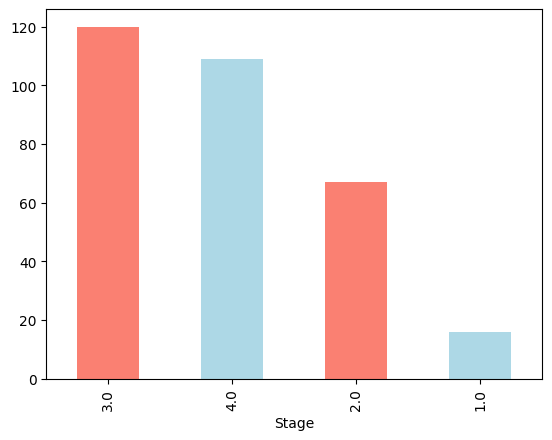

In [63]:
# построим гистограмму распределения значений в столбце стадия цирроза:

cirrhosis.Stage.value_counts().plot(kind="bar", color=["salmon", "lightblue"])

In [64]:
# удаляем столбцы с более чем 30% пропущенных значений:

thresh = cirrhosis.shape[0]*0.7
cirrhosis = cirrhosis.dropna(thresh=thresh, axis=1)
print(cirrhosis.shape[1])

# удалим все строки с пропущенными значениями:
cirrhosis = cirrhosis.dropna()
cirrhosis.drop('ID', axis=1, inplace=True)
cirrhosis.info()

20
<class 'pandas.core.frame.DataFrame'>
Index: 276 entries, 0 to 311
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         276 non-null    int64  
 1   Status         276 non-null    int64  
 2   Drug           276 non-null    int64  
 3   Age            276 non-null    int64  
 4   Sex            276 non-null    int64  
 5   Ascites        276 non-null    int64  
 6   Hepatomegaly   276 non-null    int64  
 7   Spiders        276 non-null    int64  
 8   Edema          276 non-null    object 
 9   Bilirubin      276 non-null    float64
 10  Cholesterol    276 non-null    float64
 11  Albumin        276 non-null    float64
 12  Copper         276 non-null    float64
 13  Alk_Phos       276 non-null    float64
 14  SGOT           276 non-null    float64
 15  Tryglicerides  276 non-null    float64
 16  Platelets      276 non-null    float64
 17  Prothrombin    276 non-null    float64
 18  Stage       

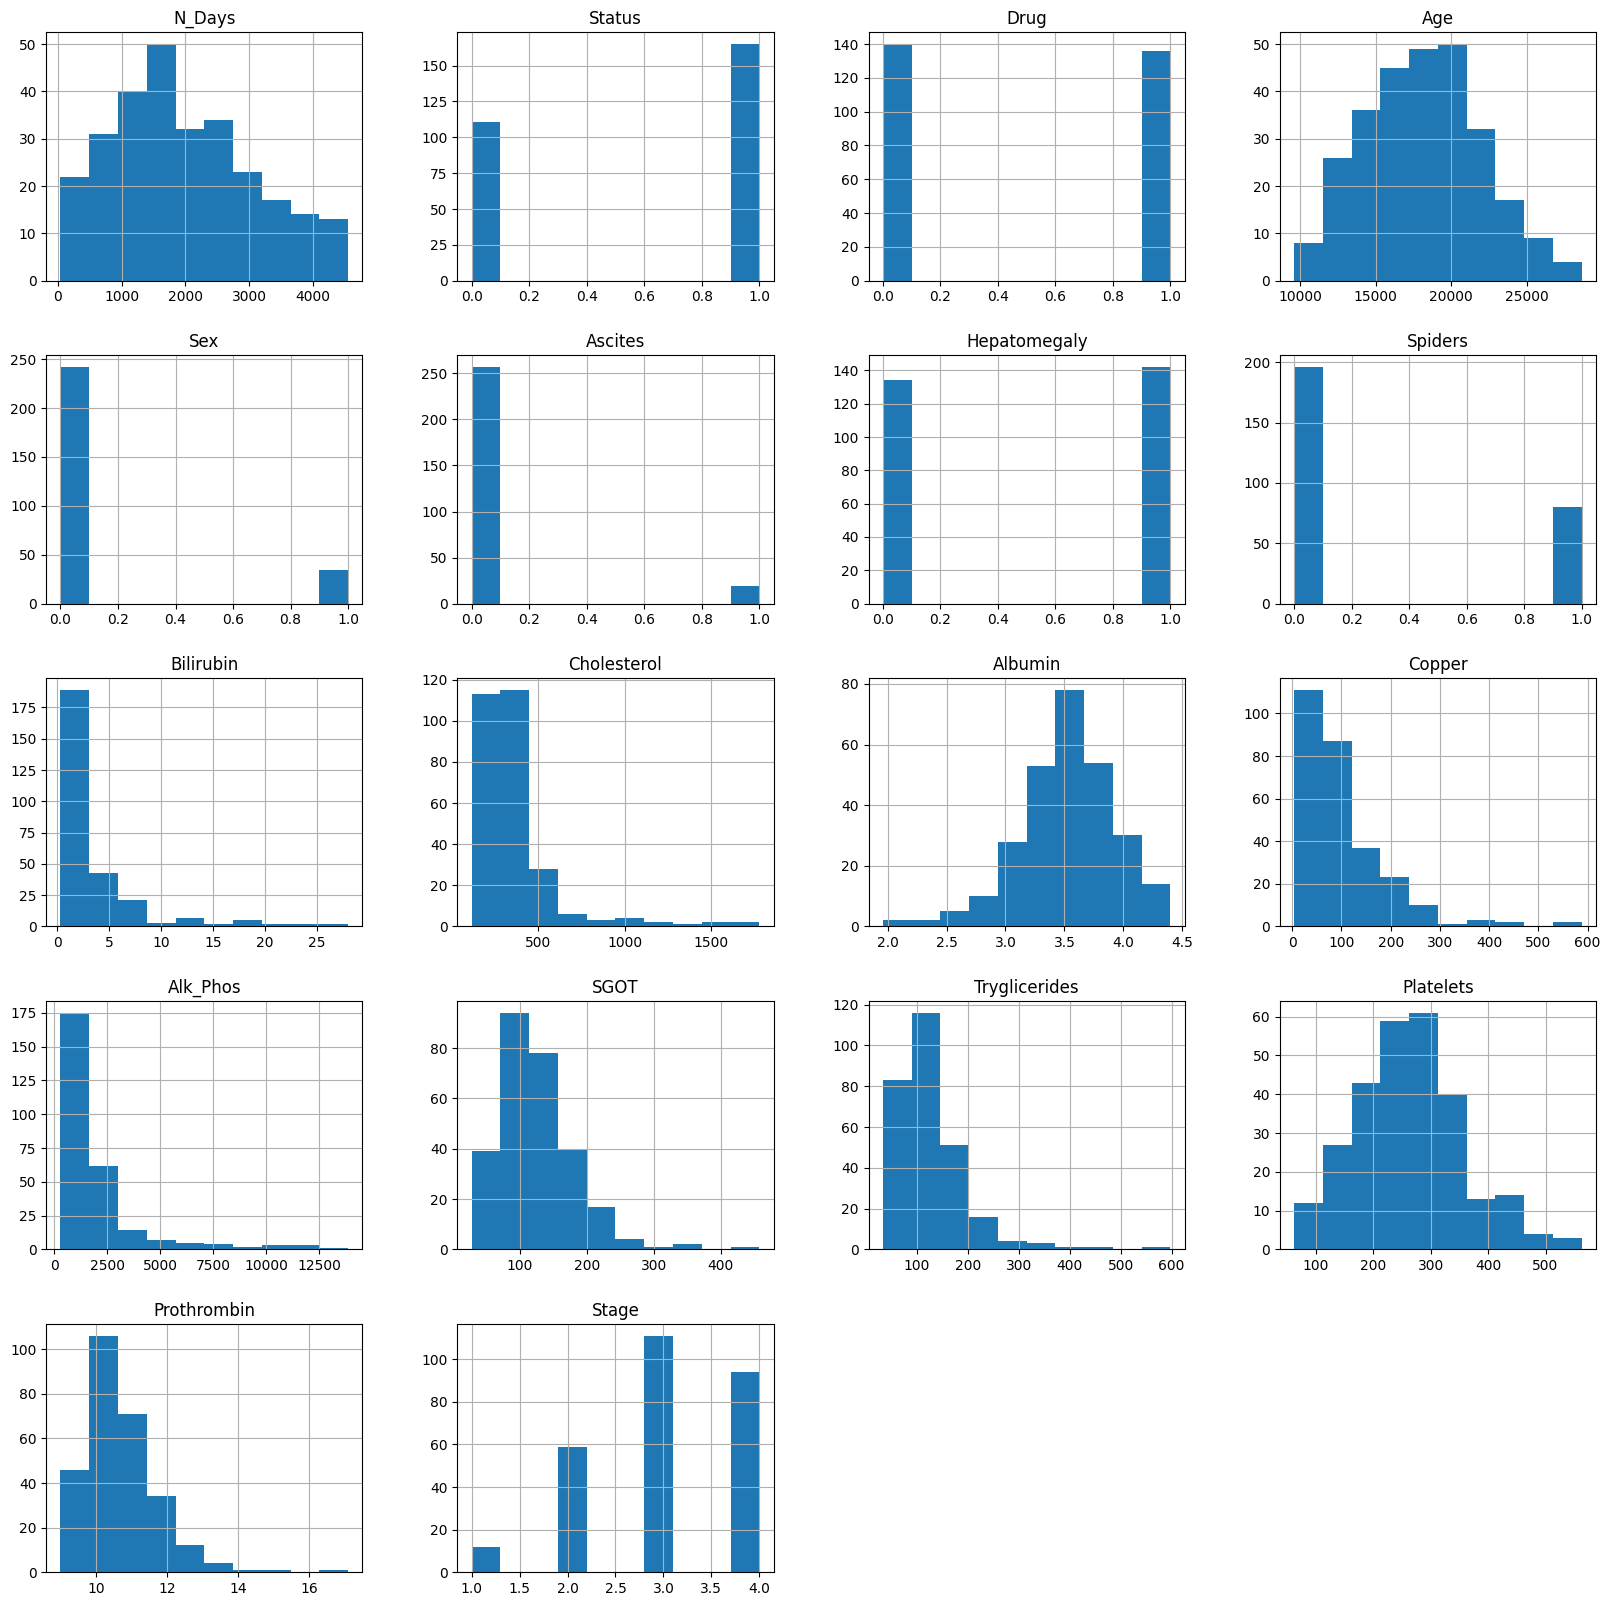

In [65]:
# построим гистограммы для всех столбцов с числовыми данными:

cirrhosis.hist(figsize=(20,20))
plt.show()

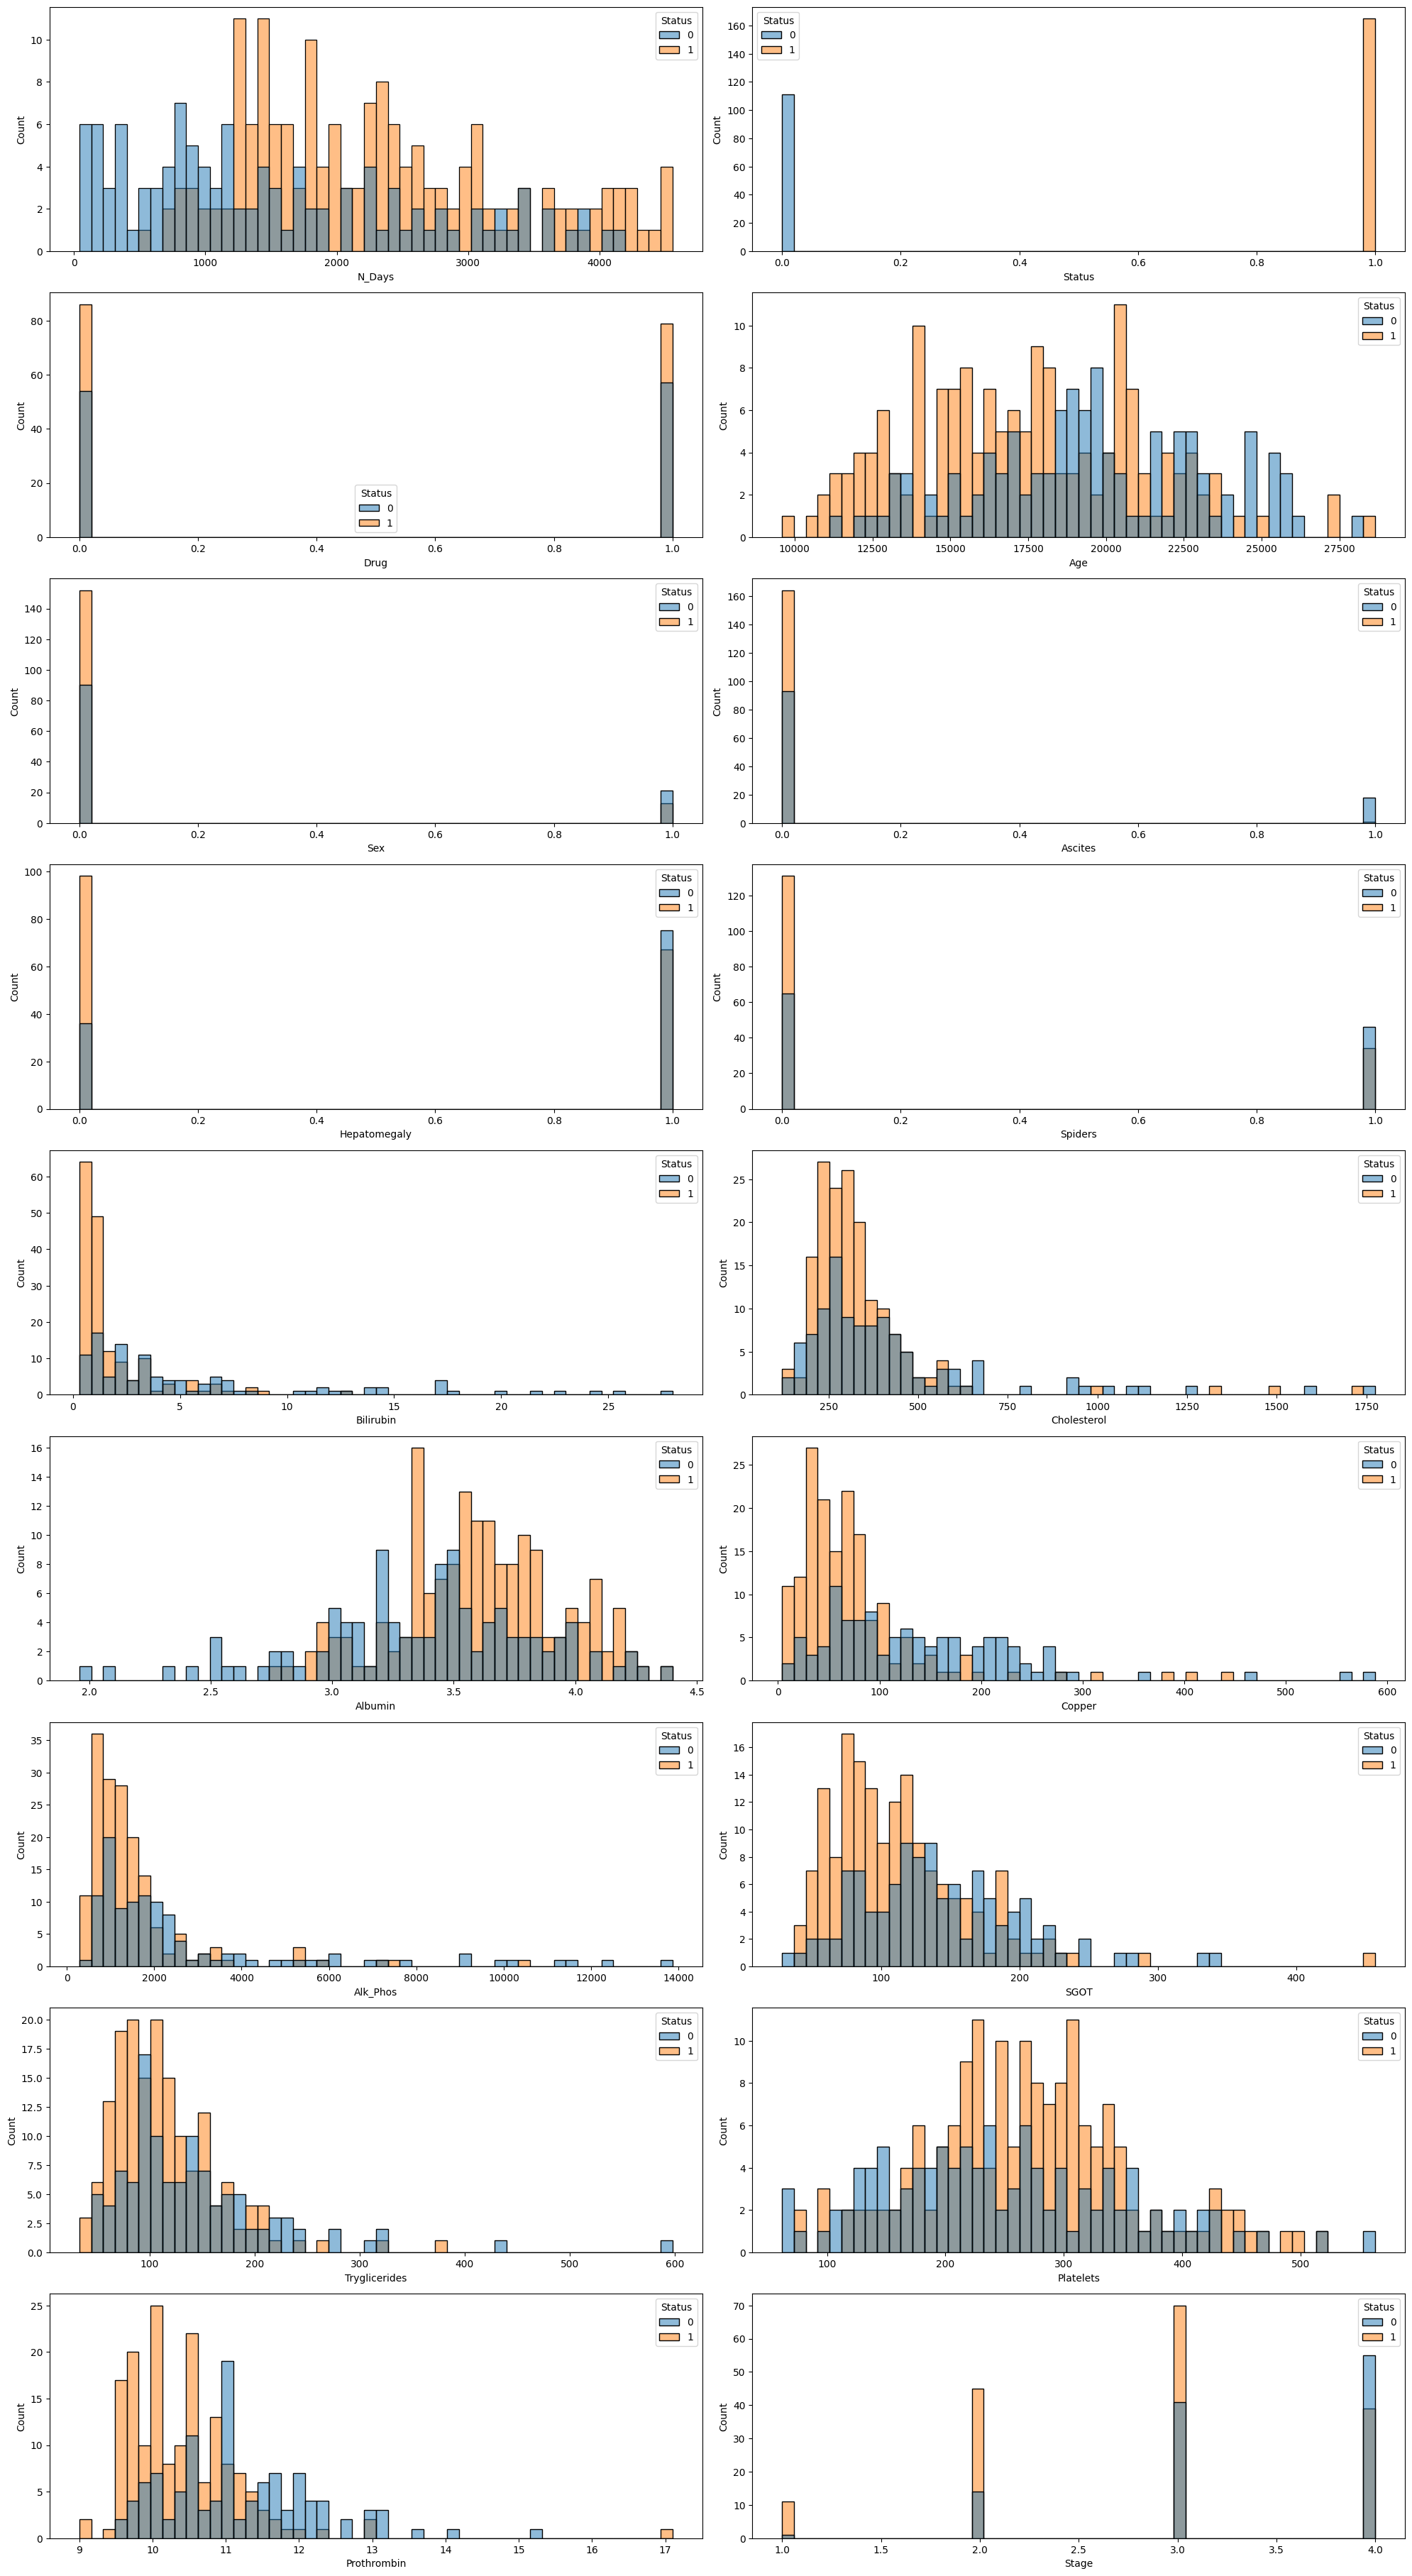

In [66]:
plt.figure(figsize=(20, 40), dpi=100)

for i, column in enumerate(cirrhosis.select_dtypes(include=['number']), start=1):
    plt.subplot(10, 2, i)
    sns.histplot(data=cirrhosis, x=column, hue='Status', bins=50)
    plt.tight_layout()

После предварительного изучения данных проведем качественный анализ, чтобы изучить корреляции между различными показателями:

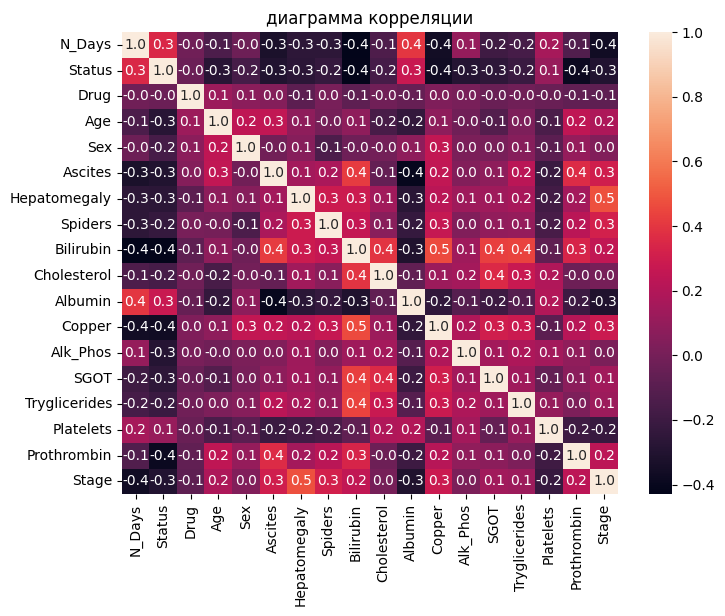

In [67]:
plt.figure(figsize=(8, 6), dpi=100)
plt.title("диаграмма корреляции")
sns.heatmap(cirrhosis.select_dtypes(include=['number']).corr(), annot=True, fmt = '0.1f');

In [68]:
cirrhosis_new = cirrhosis.select_dtypes(include=np.number)

In [69]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    cirrhosis_new.drop("Status", axis=1),
    cirrhosis_new["Status"],
    test_size=0.2,
    random_state=42,
    shuffle=True,
    stratify=cirrhosis_new["Status"]
)

In [70]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((220, 17), (56, 17), (220,), (56,))

In [71]:
# Масштабирование данных
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [72]:
def calculate_specificity(true_labels, predictions):
    conf_matrix = confusion_matrix(true_labels, predictions)
    tn, fp, fn, tp = conf_matrix.ravel()
    specif = (tn / (tn + fp)).round(4)
    return specif, (tn, fp, fn, tp)

In [73]:
def get_all_metrics(
    true_labels,
    predictions,
    probabilities,
    print_metrics=False,
    **kwargs,
):
    kwargs_precision_recall_f1_pr_auc = dict()
    kwargs_roc_auc = dict()
    probabilities = probabilities[:, 1]
    true_predicted_labels_precision_recall_f1 = {
        "y_true": true_labels,
        "y_pred": predictions,
    }
    true_predicted_labels_pr_auc = {
        "y_true": true_labels,
        "y_score": probabilities,
    }
    accuracy = round(accuracy_score(true_labels, predictions), 4)
    balanced_accuracy=balanced_accuracy_score(true_labels, predictions).round(4)
    precision = precision_score(**true_predicted_labels_precision_recall_f1, **kwargs_precision_recall_f1_pr_auc).round(4)
    recall = recall_score(**true_predicted_labels_precision_recall_f1, **kwargs_precision_recall_f1_pr_auc).round(4)
    f1 = f1_score(**true_predicted_labels_precision_recall_f1, **kwargs_precision_recall_f1_pr_auc).round(4)

    roc_auc = roc_auc_score(true_labels, probabilities, **kwargs_roc_auc).round(4)
    pr_auc = average_precision_score(**true_predicted_labels_pr_auc, **kwargs_precision_recall_f1_pr_auc).round(4)

    specificity, conf_matrix = calculate_specificity(true_labels, predictions)


    tn, fp, fn, tp = conf_matrix

    if print_metrics:
        print(
            "Accuracy = {}\nBalanced_accuracy={}\nPrecision = {}\nRecall = {}\nF1_score = {}\nROC AUC = {}\nPR AUC = {}\nSpecificity = {}".format(
                accuracy, balanced_accuracy, precision, recall, f1, roc_auc, pr_auc, specificity
            )
        )
    return {
        "Accuracy": accuracy,
        "Balanced accuracy": balanced_accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1_score": f1,
        "ROC AUC": roc_auc,
        "PR AUC": pr_auc,
        "Specificity": specificity
    }

In [74]:
def model_train_test(X_train, y_train, X_test, y_test, model, **kwargs):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    proba = model.predict_proba(X_test)
    if isinstance(model, LogisticRegression):
        importance = model.coef_[0]
    elif isinstance(model, DecisionTreeClassifier):
        importance = model.feature_importances_
    else:
         importance = None
    print(str(model), end="\n\n")

    all_metrics = get_all_metrics(
        y_test,
        pred,
        proba,
        print_metrics=True,
        **kwargs,
    )
    return pred, proba, importance, all_metrics

In [75]:
pred_logreg, proba_logreg, importance_logreg, all_metrics_logreg = model_train_test(
    X_train, y_train.values,
    X_test, y_test.values,
    LogisticRegression(random_state=42, max_iter=1000)
)

LogisticRegression(max_iter=1000, random_state=42)

Accuracy = 0.6607
Balanced_accuracy=0.6462
Precision = 0.7059
Recall = 0.7273
F1_score = 0.7164
ROC AUC = 0.7022
PR AUC = 0.7923
Specificity = 0.5652


In [76]:
X_train = pd.DataFrame(X_train, columns=['Albumin', 'Bilirubin', 'Prothrombin', 'Spiders', 'Stage', 'Sex', 'Ascites', 'Drug', 'Platelets', 'Copper', 'Age', 'Tryglicerides', 'SGOT', 'Alk_Phos', 'Cholesterol', 'Edema', 'Hepatomegaly'])

In [77]:
# Определение модели и гиперпараметров
model_lr = LogisticRegression(max_iter=1000)  # Увеличение max_iter
params = [
    {'C': [0.1, 1, 10], 'solver': ['liblinear']},
    {'C': [0.1, 1, 10], 'solver': ['lbfgs']}
]

# Подбор гиперпараметров с помощью GridSearchCV
grid_search = GridSearchCV(model_lr, params, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Лучшая модель и её гиперпараметры
best_model = grid_search.best_estimator_
print("Лучшие гиперпараметры:", grid_search.best_params_)

# Оценка модели на тестовой выборке
y_pred = best_model.predict(X_test)
print("Результаты на тестовой выборке:")
print(classification_report(y_test, y_pred))

Лучшие гиперпараметры: {'C': 0.1, 'solver': 'lbfgs'}
Результаты на тестовой выборке:
              precision    recall  f1-score   support

           0       0.60      0.52      0.56        23
           1       0.69      0.76      0.72        33

    accuracy                           0.66        56
   macro avg       0.65      0.64      0.64        56
weighted avg       0.66      0.66      0.66        56



C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [79]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

# Получение важности признаков
feature_importance_lr = np.abs(model_lr.coef_[0])
feature_names_lr = X_train.columns

# Создание DataFrame для удобного отображения
importance_lr = pd.DataFrame({'Feature': feature_names_lr, 'Importance': feature_importance_lr})
importance_lr = importance_lr.sort_values(by='Importance', ascending=False)

print(importance_lr)

          Feature  Importance
15          Edema    0.949897
11  Tryglicerides    0.873124
2     Prothrombin    0.634961
7            Drug    0.515011
0         Albumin    0.513775
10            Age    0.292231
13       Alk_Phos    0.275971
16   Hepatomegaly    0.245328
8       Platelets    0.236403
6         Ascites    0.208770
12           SGOT    0.199453
9          Copper    0.181346
1       Bilirubin    0.093205
4           Stage    0.074577
5             Sex    0.041927
3         Spiders    0.030563
14    Cholesterol    0.029668


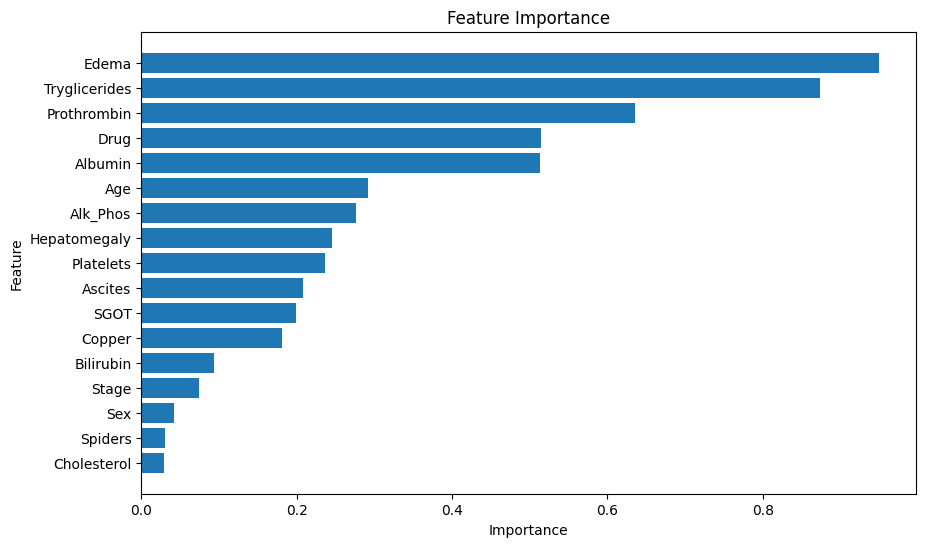

In [80]:
# Визуализация важности признаков
plt.figure(figsize=(10, 6))
plt.barh(importance_lr['Feature'], importance_lr['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

In [81]:
# Инициализация модели дерева решений
model = DecisionTreeClassifier(random_state=42)

pred_dt, proba_dt, importance_dt, all_metrics_dt = model_train_test(
    X_train, y_train.values,
    X_test, y_test.values,
    DecisionTreeClassifier(random_state=42))

DecisionTreeClassifier(random_state=42)

Accuracy = 0.6429
Balanced_accuracy=0.6179
Precision = 0.6757
Recall = 0.7576
F1_score = 0.7143
ROC AUC = 0.6179
PR AUC = 0.6547
Specificity = 0.4783


C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [82]:
# Определение модели и гиперпараметров
model_dt = DecisionTreeClassifier()
params = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Подбор гиперпараметров с помощью GridSearchCV
grid_search = GridSearchCV(model_dt, params, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Лучшая модель и её гиперпараметры
best_model = grid_search.best_estimator_
print("Лучшие гиперпараметры:", grid_search.best_params_)

# Оценка модели на тестовой выборке
y_pred = best_model.predict(X_test)
print("Результаты на тестовой выборке:")
print(classification_report(y_test, y_pred))

Лучшие гиперпараметры: {'criterion': 'entropy', 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2}
Результаты на тестовой выборке:
              precision    recall  f1-score   support

           0       0.52      0.70      0.59        23
           1       0.72      0.55      0.62        33

    accuracy                           0.61        56
   macro avg       0.62      0.62      0.61        56
weighted avg       0.64      0.61      0.61        56



C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [84]:
# Создание и обучение модели дерева решений
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)

# Получение важности признаков
feature_importance_dt = model_dt.feature_importances_
feature_names_dt = X_train.columns

# Создание DataFrame для удобного отображения
importance_dt = pd.DataFrame({'Feature': feature_names_dt, 'Importance': feature_importance_dt})
importance_dt = importance_dt.sort_values(by='Importance', ascending=False)

print(importance_dt)

          Feature  Importance
0         Albumin    0.304875
15          Edema    0.140990
10            Age    0.129482
11  Tryglicerides    0.114449
13       Alk_Phos    0.072202
8       Platelets    0.056466
12           SGOT    0.044264
7            Drug    0.042525
14    Cholesterol    0.039193
2     Prothrombin    0.027776
9          Copper    0.015152
16   Hepatomegaly    0.012626
6         Ascites    0.000000
1       Bilirubin    0.000000
5             Sex    0.000000
4           Stage    0.000000
3         Spiders    0.000000


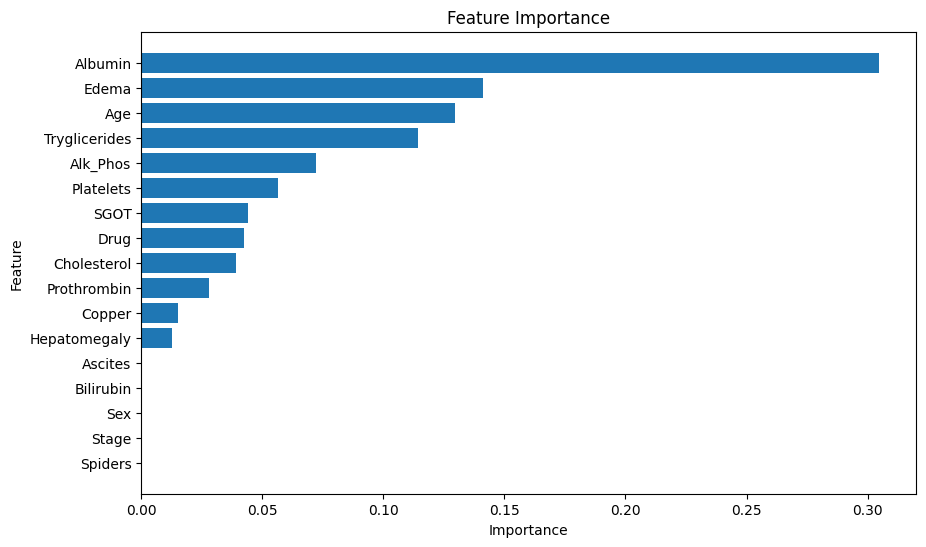

In [85]:
# Визуализация важности признаков
plt.figure(figsize=(10, 6))
plt.barh(importance_dt['Feature'], importance_dt['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

In [86]:
# Инициализация модели случайного леса
model = RandomForestClassifier(random_state=42)


pred_rf, proba_rf, importance_rf, all_metrics_rf = model_train_test(
    X_train, y_train.values,
    X_test, y_test.values,
    RandomForestClassifier()
)

RandomForestClassifier()

Accuracy = 0.6607
Balanced_accuracy=0.6462
Precision = 0.7059
Recall = 0.7273
F1_score = 0.7164
ROC AUC = 0.6765
PR AUC = 0.7354
Specificity = 0.5652


C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [92]:
# Определение модели и гиперпараметров
model_rf = RandomForestClassifier()
params = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Подбор гиперпараметров с помощью GridSearchCV
grid_search = GridSearchCV(model_rf, params, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Лучшая модель и её гиперпараметры
best_model = grid_search.best_estimator_
print("Лучшие гиперпараметры:", grid_search.best_params_)

# Оценка модели на тестовой выборке
y_pred = best_model.predict(X_test)
print("Результаты на тестовой выборке:")
print(classification_report(y_test, y_pred))

Лучшие гиперпараметры: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Результаты на тестовой выборке:
              precision    recall  f1-score   support

           0       0.59      0.57      0.58        23
           1       0.71      0.73      0.72        33

    accuracy                           0.66        56
   macro avg       0.65      0.65      0.65        56
weighted avg       0.66      0.66      0.66        56



C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [93]:
# Инициализация модели случайного леса
model_rf = RandomForestClassifier(random_state=42)

# Обучение модели
model_rf.fit(X_train, y_train)

# Получение важности признаков
feature_importance_rf = model_rf.feature_importances_
feature_names_rf = X_train.columns

# Создание DataFrame для удобного отображения
importance_rf = pd.DataFrame({'Feature': feature_names_rf, 'Importance': feature_importance_rf})
importance_rf = importance_rf.sort_values(by='Importance', ascending=False)

print(importance_rf)

          Feature  Importance
0         Albumin    0.143776
15          Edema    0.132962
7            Drug    0.116934
11  Tryglicerides    0.109006
2     Prothrombin    0.092909
10            Age    0.089024
8       Platelets    0.074849
13       Alk_Phos    0.052946
9          Copper    0.042857
12           SGOT    0.041555
14    Cholesterol    0.036690
16   Hepatomegaly    0.020140
4           Stage    0.013258
6         Ascites    0.010448
5             Sex    0.010026
3         Spiders    0.006412
1       Bilirubin    0.006210


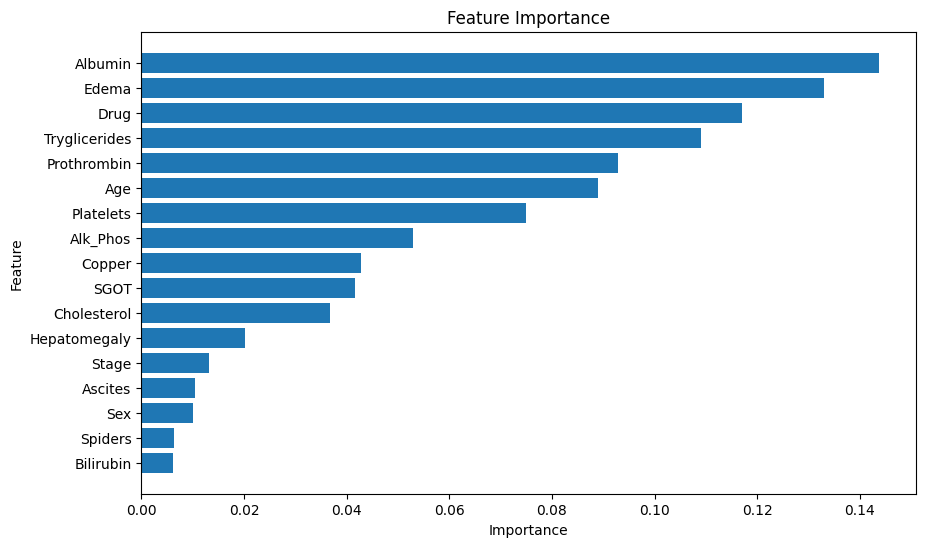

In [94]:
# Визуализация важности признаков
plt.figure(figsize=(10, 6))
plt.barh(importance_rf['Feature'], importance_rf['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

При использовании гиперпараметров и обучении новых моделей самый высокий показатель accuracy у модели случайный лес. При использовании гиперпараметров показатель accuracy улучшился у модели дерево решений, у моделей логистической регрессии и случайный лес остался на прежнем уровне. Возможно для обучения моделей недостаточно сведений. При получении большего объема информации модели обучились бы лучше и выдали более высокие качественные показатели. 

Топ общих важных признаков во всех трех используемых моделях логистической регрессии, дерево решений, случайный лес: появление отеков, уровень триглицеридов в крови, показатель альбумина.
